# DMML Assignment 1

- **Name:** Sampad Kumar Kar
- **Roll No.:** BMC201944

# Imports

In [1]:
# Imported for proper rendering of Latex in notebook
from IPython.display import display, Math, Latex

In [2]:
# Commonn Imports
import numpy as np
import pandas as pd

# To make this notebook's outputs stable across runs
np.random.seed(42)

In [3]:
# For data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [133]:
# data balancing
from imblearn.over_sampling import SMOTE

In [134]:
# sklearn Imports

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Dataset

For this assignment, we will be dealing with the **Bank Marketing Data Set** from the UCI Machine Learning Repository.

This is the [link](https://www.cmi.ac.in/~madhavan/courses/dmml2022/assignment1/bank-data.zip) to the dataset.

We first clean, analyze and then pre-process the data before training it with various models.

In [5]:
# Loading the dataset
data = pd.read_csv('./bank-data/bank-additional-full.csv',sep=';')

In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
data.shape

(41188, 21)

This dataset has $41188$ examples and $20$ columns in total (excluding the 'Serial No.' column).

In [9]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

We can see that there are $20$ features and $1$ target column (the last column `y`). We will try and analyze these columns individually.

## Data Analysis

Firstly, let's look at the correlation between various numerical features in the dataset.

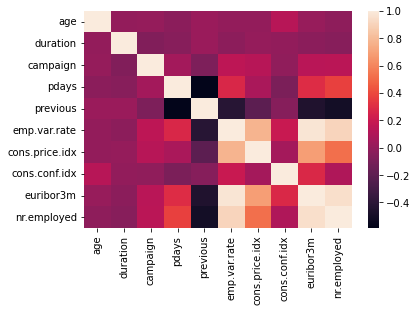

In [11]:
correlations_data = data.corr()
sns.heatmap(correlations_data)
plt.show()

Now, we do a bit of data analysis to check the out the individual features (to gain impormation regarding some interesting attributes).

### Age

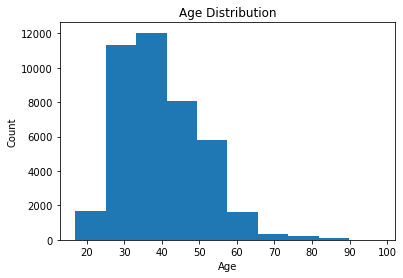

In [12]:
# Age Distribution Graph
plt.figure()
plt.hist(data['age'])
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()

It looks like the majority of the customers are in the age group of $25-50$ years of age.

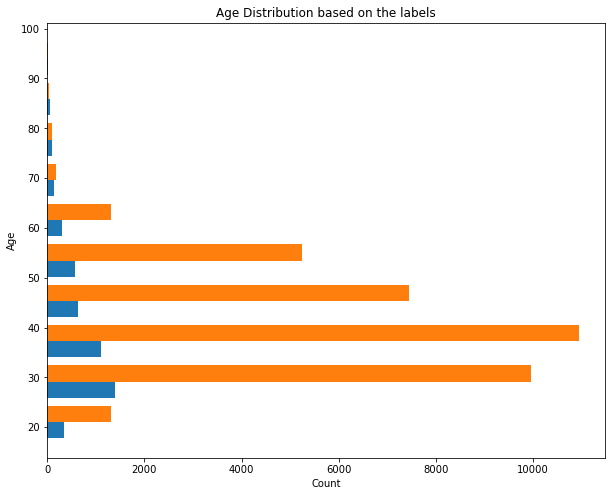

In [13]:
# Age distribution based on Labels
# Age Distribution Graph
plt.figure(figsize=(10,8))
data_1 = data['age'][data['y'] == 'yes']
data_2 = data['age'][data['y'] == 'no']
plt.hist([data_1, data_2], orientation='horizontal')
plt.xlabel("Count")
plt.ylabel("Age")
plt.title("Age Distribution based on the labels")
plt.show()

### Job

In [14]:
data['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

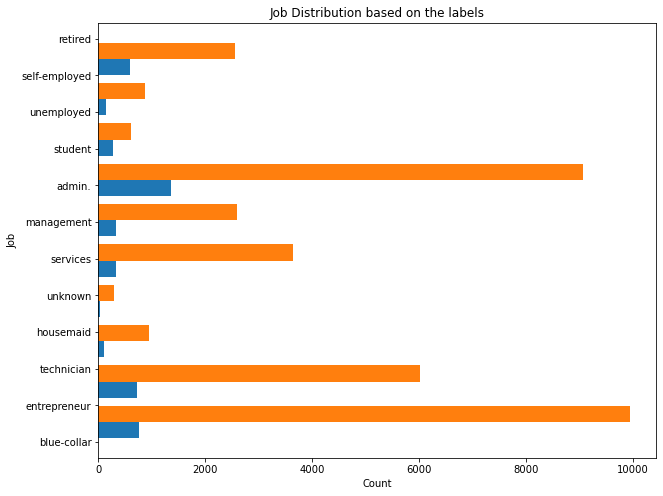

In [15]:
plt.figure(figsize=(10,8))
data_1 = data['job'][data['y'] == 'yes']
data_2 = data['job'][data['y'] == 'no']
plt.hist([data_1,data_2], orientation='horizontal')
plt.xlabel("Count")
plt.ylabel("Job")
plt.title("Job Distribution based on the labels")
plt.show()

It seems like there is high no. of subscribers from people with job description of `admin`, `technician` and `blue-collar`.

### Marital

In [16]:
data['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

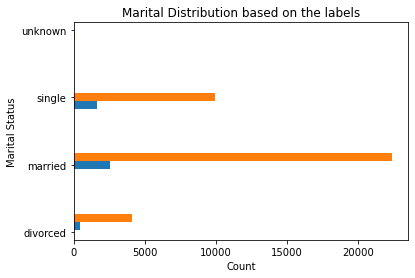

In [17]:
plt.figure()
data_1 = data['marital'][data['y'] == 'yes']
data_2 = data['marital'][data['y'] == 'no']
plt.hist([data_1,data_2], orientation='horizontal')
plt.xlabel("Count")
plt.ylabel("Marital Status")
plt.title("Marital Distribution based on the labels")
plt.show()

It looks like majority of the subcribers are married.

### Education

In [18]:
data['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

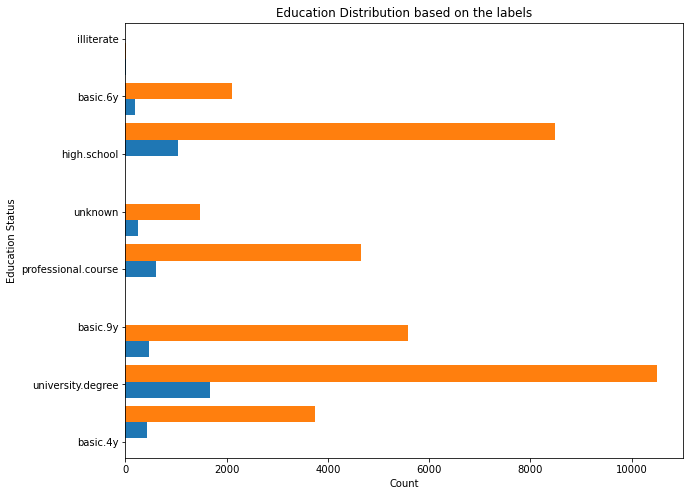

In [19]:
plt.figure(figsize=(10,8))
data_1 = data['education'][data['y'] == 'yes']
data_2 = data['education'][data['y'] == 'no']
plt.hist([data_1,data_2], orientation='horizontal')
plt.xlabel("Count")
plt.ylabel("Education Status")
plt.title("Education Distribution based on the labels")
plt.show()

People with a education status of `basic.6y` and `university.degree` seem to be the majority of subscribers.

### Default

In [20]:
data['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

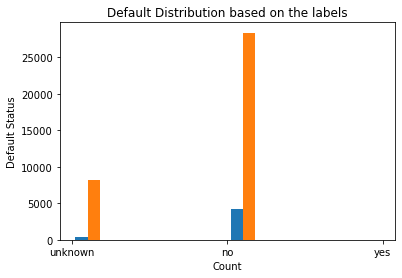

In [21]:
plt.figure()
data_1 = data['default'][data['y'] == 'yes']
data_2 = data['default'][data['y'] == 'no']
plt.hist([data_1,data_2])
plt.xlabel("Count")
plt.ylabel("Default Status")
plt.title("Default Distribution based on the labels")
plt.show()

### Housing

In [22]:
data['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

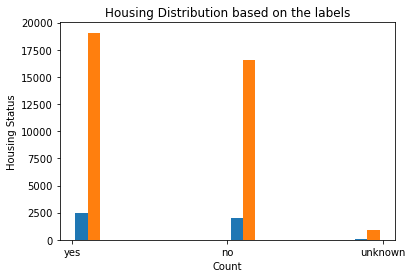

In [23]:
plt.figure()
data_1 = data['housing'][data['y'] == 'yes']
data_2 = data['housing'][data['y'] == 'no']
plt.hist([data_1,data_2])
plt.xlabel("Count")
plt.ylabel("Housing Status")
plt.title("Housing Distribution based on the labels")
plt.show()

Seems like the proportion of people with the status of `no` housing loans tend to subscribe more than the ones with the status of `yes` housing loans.

### Loan

In [24]:
data['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

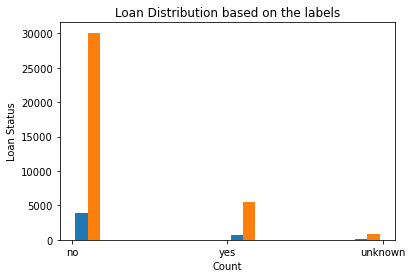

In [25]:
plt.figure()
data_1 = data['loan'][data['y'] == 'yes']
data_2 = data['loan'][data['y'] == 'no']
plt.hist([data_1,data_2])
plt.xlabel("Count")
plt.ylabel("Loan Status")
plt.title("Loan Distribution based on the labels")
plt.show()

Majority of the costumers have `no` personal loan associated with the bank.

Costumers with `no` personal loan status tend to subscribe more than that of the ones with `yes` personal loan status.

### Call Duration

In [26]:
data['duration'].dtype

dtype('int64')

<function matplotlib.pyplot.show(close=None, block=None)>

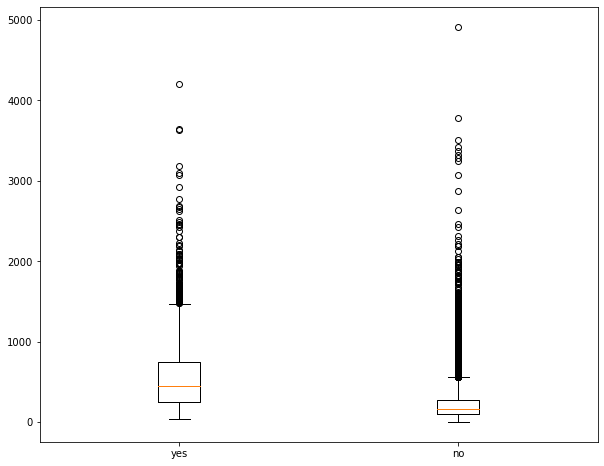

In [27]:
data_1 = data['duration'][data['y'] == 'yes']
data_2 = data['duration'][data['y'] == 'no']

data_dict = {'yes':data_1, 'no':data_2}

fig, ax = plt.subplots(figsize=(10,8))
ax.boxplot(data_dict.values())
ax.set_xticklabels(data_dict.keys())
plt.show

In [28]:
data_1.median()

449.0

In [29]:
data_2.median()

163.5

As we can observe from the boxplots and median calculation, the median value of the call duration for the subscribed customers are way higher than that with the ones who haven't.

### Campaign

In [30]:
data['campaign'].dtype

dtype('int64')

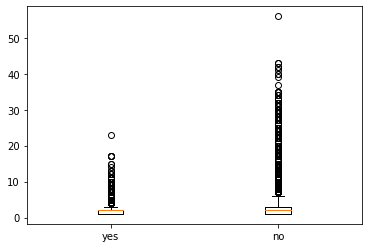

In [31]:
data_1 = data['campaign'][data['y'] == 'yes']
data_2 = data['campaign'][data['y'] == 'no']

data_dict = {'yes':data_1, 'no':data_2}

fig, ax = plt.subplots()
ax.boxplot(data_dict.values())
ax.set_xticklabels(data_dict.keys())
plt.show()

In [32]:
data_1.mean()

2.0517241379310347

In [33]:
data_2.mean()

2.6330852577432418

It seems like the average no. of campaign calls to the non-subscribers (`no`) is higher than the average no. of campaign calls to the subscribers (`yes`). This might be because the non-subscribers require more convinvcing, which explains the higher average calls.

### Previous days

This represents the no. of days that has passed by after the client waas last contacted from a previous campaign.

Here, $999$ means the client was not previously contacted.

In [34]:
data['pdays'].dtype

dtype('int64')

In [35]:
data['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

In [36]:
(data['pdays'] == 999).value_counts()

True     39673
False     1515
Name: pdays, dtype: int64

Since, most of the customers were not contacted in the previous campaign, this attribute will not prove to be too useful.

### Previous

No. of contacts performed beore this campaign for the client.

In [37]:
data['previous'].dtype

dtype('int64')

In [38]:
data['previous'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

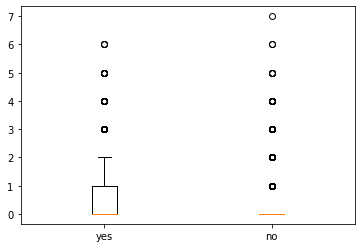

In [39]:
data_1 = data['previous'][data['y'] == 'yes']
data_2 = data['previous'][data['y'] == 'no']

data_dict = {'yes':data_1, 'no':data_2}

fig, ax = plt.subplots()
ax.boxplot(data_dict.values())
ax.set_xticklabels(data_dict.keys())
plt.show()

In [40]:
data_1.mean()

0.49267241379310345

In [41]:
data_2.mean()

0.13237386450694977

It seems that the customers that subscribed this time around were contacted more during the previous campaign than the ones who didn't subscribe.

### Previous Outcome

Outcome of the previous marketing campaign.

In [42]:
data['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

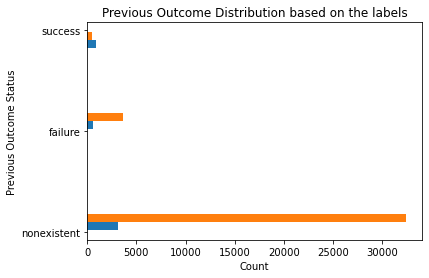

In [43]:
plt.figure()
data_1 = data['poutcome'][data['y'] == 'yes']
data_2 = data['poutcome'][data['y'] == 'no']
plt.hist([data_1,data_2], orientation='horizontal')
plt.xlabel("Count")
plt.ylabel("Previous Outcome Status")
plt.title("Previous Outcome Distribution based on the labels")
plt.show()

In [44]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### Target Attribute

In [45]:
data['y'].unique()

array(['no', 'yes'], dtype=object)

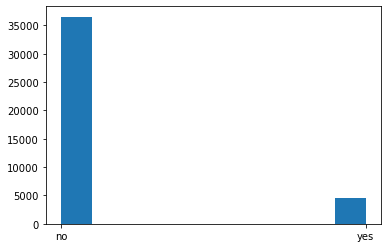

In [46]:
plt.figure()
plt.hist(data['y'])
plt.show()

This clearly shows an imbalance in the dataset. So for effective classification, we will rebalance the data.

## Data Preprocessing

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Let's create a copy of the dataframe to actually to preprocess.

In [48]:
df = data.copy()

In order to train the classfication models, we need to preprocess the categorical attributes into various numerical formats.

There are several pre-processing strategies we can use. Some of them are-
- We can convert the binary columns (`default`, `housing`, `loan`) excluding the `unknown` entries, into numeric columns of `1` and `0`.
- We can convert other categorical features (like `job`, `marital`, `education`, `contact`, `month`, `poutcome`) into numeric one-hot-encoding.
> **Note:** We will be ignoring `day_of_week` and `month` as it seems irrelevant w.r.t. the target
- We will also convert the numeric attribute `pdays` into binary label of `0` and `1` (`0` if the customer wasn't contacted in the previous campaign and `1` if he was).
- We will keep the rest of numeric features as it is and feed them into the model.
- Finally, we create a function to apply all the preprocessing steps.

In [49]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### Converting the target column into Binary Columns

In [50]:
df['target_bin'] = df['y'].apply(lambda row: 1 if row == 'yes' else 0)
# we will assume unknown values to be marked 0 as well

In [51]:
df[['y', 'target_bin']].head()

,y,target_bin
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0


### Converting to Binary Columns

In [52]:
df['default_bin'] = df['default'].apply(lambda row: 1 if row == 'yes' else 0)
# we will assume unknown values to be marked 0 as well
df['housing_bin'] = df['housing'].apply(lambda row: 1 if row == 'yes' else 0)
# we will assume unknown values to be marked 0 as well
df['loan_bin'] = df['loan'].apply(lambda row: 1 if row == 'yes' else 0)
# we will assume unknown values to be marked 0 as well

In [53]:
df[['default', 'default_bin', 'housing', 'housing_bin', 'loan', 'loan_bin']].head()

,default,default_bin,housing,housing_bin,loan,loan_bin
0,no,0,no,0,no,0
1,unknown,0,no,0,no,0
2,no,0,yes,1,no,0
3,no,0,no,0,no,0
4,no,0,no,0,yes,1


In [54]:
df['pdays_bin'] = df['pdays'].apply(lambda row: 1 if row < 999 else 0)

In [55]:
df[['pdays', 'pdays_bin']].head()

,pdays,pdays_bin
0,999,0
1,999,0
2,999,0
3,999,0
4,999,0


### Converting via One Hot Encoding

In [56]:
job_onehot = pd.get_dummies(df['job'], prefix='job')
job_onehot.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0


In [57]:
df = pd.concat([df, job_onehot], axis=1)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,1,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0


In [58]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'target_bin',
       'default_bin', 'housing_bin', 'loan_bin', 'pdays_bin', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown'],
      dtype='object')

We repeat these steps for the remaining columns for one-hot encoding.

In [59]:
marital_onehot = pd.get_dummies(df['marital'], prefix='marital')
marital_onehot.head()

,marital_divorced,marital_married,marital_single,marital_unknown
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [60]:
marital_onehot.drop('marital_unknown', axis=1, inplace=True)
marital_onehot.head()

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [61]:
df = pd.concat([df, marital_onehot], axis=1)

In [62]:
education_onehot = pd.get_dummies(df['education'], prefix='education')
df = pd.concat([df, education_onehot], axis=1)

In [63]:
poutcome_onehot = pd.get_dummies(df['poutcome'], prefix='poutcome')
df = pd.concat([df, poutcome_onehot], axis=1)

In [64]:
contact_onehot = pd.get_dummies(df['contact'], prefix='contact')
df = pd.concat([df, contact_onehot], axis=1)

After all the pre-processing, let's check all the columns in the dataframe.

In [65]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'target_bin',
       'default_bin', 'housing_bin', 'loan_bin', 'pdays_bin', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success', 'contact_cellular', 'contact_telephone'],
      dtype='object'

We only need to select the relevant and pre-processed columns. We create a helper function to do that.

In [66]:
def preprocess(data):
    df = data.copy()
   
    df['target_bin'] = df['y'].apply(lambda row: 1 if row == 'yes' else 0)
    df.drop('y', axis=1, inplace=True)
   
    df['default_bin'] = df['default'].apply(lambda row: 1 if row == 'yes' else 0)
    df.drop('default', axis=1, inplace=True)
   
    df['housing_bin'] = df['housing'].apply(lambda row: 1 if row == 'yes' else 0)
    df.drop('housing', axis=1, inplace=True)
   
    df['loan_bin'] = df['loan'].apply(lambda row: 1 if row == 'yes' else 0)
    df.drop('loan', axis=1, inplace=True)
   
    df['pdays_bin'] = df['pdays'].apply(lambda row: 1 if row < 999 else 0)
    df.drop('pdays', axis=1, inplace=True)
    
    job_onehot = pd.get_dummies(df['job'], prefix='job')
    df = pd.concat([df, job_onehot], axis=1)
    df.drop('job', axis=1, inplace=True)
    
    marital_onehot = pd.get_dummies(df['marital'], prefix='marital')
    marital_onehot.drop('marital_unknown', axis=1, inplace=True)
    df = pd.concat([df, marital_onehot], axis=1)
    df.drop('marital', axis=1, inplace=True)
    
    education_onehot = pd.get_dummies(df['education'], prefix='education')
    df = pd.concat([df, education_onehot], axis=1)
    df.drop('education', axis=1, inplace=True)
    
    poutcome_onehot = pd.get_dummies(df['poutcome'], prefix='poutcome')
    df = pd.concat([df, poutcome_onehot], axis=1)
    df.drop('poutcome', axis=1, inplace=True)

    contact_onehot = pd.get_dummies(df['contact'], prefix='contact')
    df = pd.concat([df, contact_onehot], axis=1)
    df.drop('contact', axis=1, inplace=True)

    # Dropping the columns we are not using
    df.drop(['month', 'day_of_week'], axis=1, inplace=True)

    # Separate the features and target
    X = df.drop('target_bin', axis=1)
    y = df['target_bin']

    return X,y

Now, that we are done with pre-processing the data, we will do a sanity check by checking features and target.

In [67]:
X,y = preprocess(data)

In [68]:
print("The shape of pre-processed input is: ", X.shape)
print("The shape of the target is: ", y.shape)

The shape of pre-processed input is:  (41188, 41)
The shape of the target is:  (41188,)


In [69]:
X.columns

Index(['age', 'duration', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'default_bin', 'housing_bin', 'loan_bin', 'pdays_bin', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success', 'contact_cellular', 'contact_telephone'],
      dtype='object')

In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   previous                       41188 non-null  int64  
 4   emp.var.rate                   41188 non-null  float64
 5   cons.price.idx                 41188 non-null  float64
 6   cons.conf.idx                  41188 non-null  float64
 7   euribor3m                      41188 non-null  float64
 8   nr.employed                    41188 non-null  float64
 9   default_bin                    41188 non-null  int64  
 10  housing_bin                    41188 non-null  int64  
 11  loan_bin                       41188 non-null  int64  
 12  pdays_bin                      41188 non-null 

### Rebalancing the dataset

We will the `SMOTE` (Synthetic Minority Oversampling Technique) from `imblearn` library to rebalance the data.

In [71]:
from imblearn.over_sampling import SMOTE

smote_oversample = SMOTE()
X_sm, y_sm = smote_oversample.fit_resample(X,y)

Let's count the frequency of labels for the balanced dataset.

In [72]:
y_sm.value_counts()

0    36548
1    36548
Name: target_bin, dtype: int64

Now, we split the training data into Training and Test sets for model selection. For this we use `train_test_split` method from `sklearn.model_selection` module.

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size=0.2, random_state=42)

In [74]:
print("The shape of training input: ", X_train.shape)
print("The shape of training output: ", y_train.shape)

The shape of training input:  (58476, 41)
The shape of training output:  (58476,)


In [75]:
print("The shape of test input: ", X_test.shape)
print("The shape of test output: ", y_test.shape)

The shape of test input:  (14620, 41)
The shape of test output:  (14620,)


## Evaluation Metrics

Before we move on to training the actual models itself, we need to decide the evaluation metric that is to be used to evaluate the model on the test set.

We want to predict whether the customer will subscribe to the bank term deposit or not, given the attributes. We would neither want to incur False Positive predictions (i.e. when we predict that the customer will subscribe who ends up not subscribing) nor would we want to incur False Negative Predictions (i.e. when we predict that the customer will not subscribe who ends up subscribing after all). Since, we would like to avoid both, we will focus on optimizing the `f1-score` and the `ROC-AUC` (increasing Area Under ROC Curve) score.

For this, we use the confusion matrix, classification report and the ROC Curve.

Finally, we are ready to train our models!

## Decision Tree

First, we train the decision tree with all the default parameters (without any explicit hyperparameter tuning).

In [104]:
%%time

from sklearn.tree import DecisionTreeClassifier

# We will be training with default parameters
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train,y_train)

CPU times: user 334 ms, sys: 8.54 ms, total: 342 ms
Wall time: 341 ms


DecisionTreeClassifier(random_state=42)

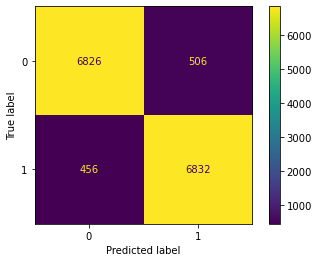

In [105]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(dtc, X_test, y_test)
plt.show()

In [106]:
from sklearn.metrics import classification_report

print(classification_report(y_test, dtc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      7332
           1       0.93      0.94      0.93      7288

    accuracy                           0.93     14620
   macro avg       0.93      0.93      0.93     14620
weighted avg       0.93      0.93      0.93     14620



So, with the default parameters, we obtain a `f1-score` of $0.93$.

There are $2$ configurable parameters in the Decision Tree Classifier:
- `max_depth`
- `min_samples_split`

We use `GridSearchCV` to search the hyperparameters based on `f1-score`.

In [97]:
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier(random_state=42)

dtc_param_grid = [
    {
        'max_depth':np.arange(1,20),
        'min_samples_split':[2,4,6,8,10]
    }
]

gs_dtc = GridSearchCV(
    dtc,
    dtc_param_grid,
    scoring='f1_micro',
    cv=4,
    n_jobs=1
)

In [98]:
gs_dtc.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=1,
             param_grid=[{'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                          'min_samples_split': [2, 4, 6, 8, 10]}],
             scoring='f1_micro')

Let's find the best parameters obtained by this gridsearch:

In [99]:
print("Best Parameters: ", gs_dtc.best_params_)

Best Parameters:  {'max_depth': 17, 'min_samples_split': 6}


Let's look at the best score obtained by the best set of hyperparameters.

In [101]:
print(gs_dtc.best_score_)

0.9343662357206375


In [102]:
best_dtc = gs_dtc.best_estimator_

In [117]:
%%time

best_dtc.fit(X_train,y_train)

CPU times: user 316 ms, sys: 7.28 ms, total: 324 ms
Wall time: 322 ms


DecisionTreeClassifier(max_depth=17, min_samples_split=6, random_state=42)

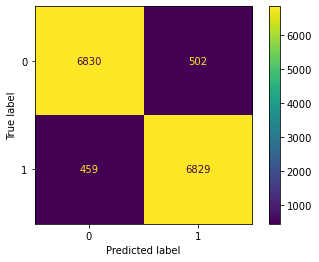

In [103]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_dtc, X_test, y_test)
plt.show()

In [107]:
from sklearn.metrics import classification_report

print(classification_report(y_test, best_dtc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      7332
           1       0.93      0.94      0.93      7288

    accuracy                           0.93     14620
   macro avg       0.93      0.93      0.93     14620
weighted avg       0.93      0.93      0.93     14620



We do not see any major improvement in the `f1-score` by tweaking the hyper-parameters, as we end up with a score of $0.93$ against the default estimator.

## Näive Bayes Classifier

## Bernoulli

Since, we are training a Binary Classifer, it makes sense to employ the Bernoulli Näive Bayes, which uses the Bernoulli Distribution as the underlying generating model.

In [108]:
%%time

from sklearn.naive_bayes import BernoulliNB

# We will be training with default parameters
bnbc = BernoulliNB()
bnbc.fit(X_train, y_train)

CPU times: user 401 ms, sys: 9.05 ms, total: 410 ms
Wall time: 99.8 ms


BernoulliNB()

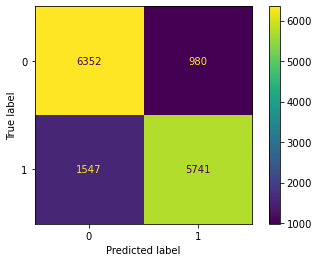

In [110]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(bnbc, X_test, y_test)
plt.show()

In [112]:
from sklearn.metrics import classification_report

print(classification_report(y_test, bnbc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83      7332
           1       0.85      0.79      0.82      7288

    accuracy                           0.83     14620
   macro avg       0.83      0.83      0.83     14620
weighted avg       0.83      0.83      0.83     14620



We achieve a `f1-score` of $0.83$ with Bernoulli Näive Bayes Classifier.

## Gaussian

In [118]:
%%time

from sklearn.naive_bayes import GaussianNB

# We will be training with default parameters
gnbc = GaussianNB()
gnbc.fit(X_train, y_train)

CPU times: user 24 ms, sys: 9.11 ms, total: 33.1 ms
Wall time: 31.7 ms


GaussianNB()

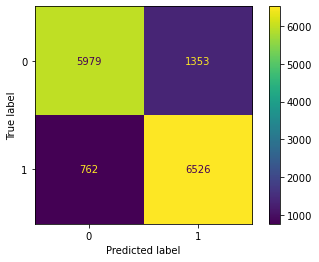

In [119]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(gnbc, X_test, y_test)
plt.show()

In [120]:
from sklearn.metrics import classification_report

print(classification_report(y_test, gnbc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      7332
           1       0.83      0.90      0.86      7288

    accuracy                           0.86     14620
   macro avg       0.86      0.86      0.86     14620
weighted avg       0.86      0.86      0.86     14620



We obtain a slightly better `f1-score` of $0.86$ with Gaussian Näive Bayes Classifier.

## Random Forest Classifier

Again, we train the Random Forest classifier with all the default parameters.

In [121]:
%%time

from sklearn.ensemble import RandomForestClassifier

# We will be training with default parameters
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

CPU times: user 5.3 s, sys: 72.5 ms, total: 5.37 s
Wall time: 5.37 s


RandomForestClassifier(random_state=42)

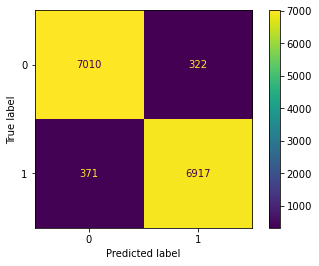

In [122]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test)
plt.show()

In [123]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      7332
           1       0.96      0.95      0.95      7288

    accuracy                           0.95     14620
   macro avg       0.95      0.95      0.95     14620
weighted avg       0.95      0.95      0.95     14620



We achieve an awesome `f1-score` of $0.95$ with Random Forest Classifer with the default parameters.

We will now tweak the hyperparameters in hope of achieving a better `f1-score`.

There are $3$ parameters we can try out for Random Forest Classifier:
- `n_estimators`
- `max_depth`
- `min_samples_split`

We use `GridSearchCV` to search the hyperparameters based on `f1-score`.

In [124]:
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(random_state=42)

rfc_param_grid = [
    {
        'n_estimators':[50,100,150,200],
        'max_depth':np.arange(1,20),
        'min_samples_split':[2,4,6,8,10],
    }
]

gs_rfc = GridSearchCV(
    rfc,
    rfc_param_grid,
    scoring='f1_micro',
    cv = 4,
    n_jobs=1
)

In [126]:
gs_rfc.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid=[{'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                          'min_samples_split': [2, 4, 6, 8, 10],
                          'n_estimators': [50, 100, 150, 200]}],
             scoring='f1_micro')

Let's find the best parameters obtained by this gridsearch:

In [127]:
print("Best Parameters: ", gs_rfc.best_params_)

Best Parameters:  {'max_depth': 18, 'min_samples_split': 2, 'n_estimators': 150}


Let's look at the best score obtained by the best set of hyperparameters.

In [128]:
print(gs_rfc.best_score_)

0.9510055407346604


In [129]:
best_rfc = gs_rfc.best_estimator_

In [130]:
%%time

best_rfc.fit(X_train, y_train)

CPU times: user 7.69 s, sys: 117 ms, total: 7.81 s
Wall time: 7.84 s


RandomForestClassifier(max_depth=18, n_estimators=150, random_state=42)

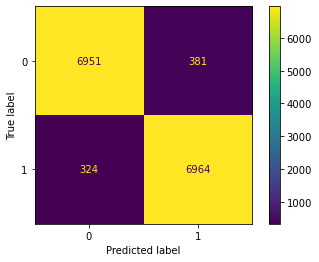

In [131]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_rfc, X_test, y_test)
plt.show()

In [132]:
from sklearn.metrics import classification_report

print(classification_report(y_test, best_rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      7332
           1       0.95      0.96      0.95      7288

    accuracy                           0.95     14620
   macro avg       0.95      0.95      0.95     14620
weighted avg       0.95      0.95      0.95     14620



Again we do not see any major improvement in the `f1-score` by tweaking the hyper-parameters, as we end up with a score of $0.93$ against the default estimator.

# Summary

- **Random Forest Classifier** gives us the best model, which generalizes well enough to give `f1-score` of around $0.951$, but takes most time to train out of the three models.
- **Bernoulli Näive Bayes Classifier** and **Gaussian Näive Bayes Classifier** turn out to be the fastest but train models with low `f1-score`.
- **Decision Tree Classifier** trains a reasonably accurate model with a `f1-score` of almost $0.934$, and also trains a lot faster than Random Forest Classifier.